# MNIST Data Set - Basic Approach

# Get the MNIST Data

In [3]:
import tensorflow as tf

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

# Visualizing the Data

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
mnist.train.images[1].shape

(784,)

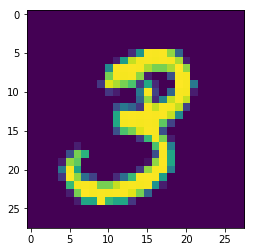

In [12]:
plt.imshow(mnist.train.images[1].reshape(28,28))

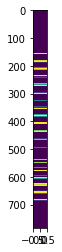

In [13]:
plt.imshow(mnist.train.images[1].reshape(784,1),aspect=0.02)

# Create the model

In [14]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [15]:
W = tf.Variable(tf.zeros([784,10]))

In [16]:
b = tf.Variable(tf.zeros([10]))

In [17]:
#create the graph
y = tf.matmul(x,W) + b

Loss and Optimizer

In [18]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [19]:
#Cross Enthropy

In [24]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [30]:
train = optimizer.minimize(cross_entropy)

In [31]:
#create Session

In [34]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    
    # train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
     
    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
   #Test the Train Model

    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print (sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))


0.9183


While this may seem pretty good, we can actually do pretty much better, the best models can get above 99% accuracy.